# BellaBeat Exploratory Analysis

### Cleaning, Code, and Comments by Cristi Marascio

### Executive Summary
This EDA will focus on the Time product line as it is most like the FitBit that was used to extract the data.

The more features on the device i.e. Activity, sleep, and weight trackers the user engaged with the more consistently they used the product.
Since the Fitbit and Time are similar in use and demographic we can apply trends noted in use to help market Time.
We see a reduction in use among most of the users as time progresses. Further study is needed around the 20-30 day from purchase mark to see why use falls off, but gathering that data can help us create a marketing strategy to increase engagement and create a more loyal customer.

## Ask
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

#### Import the Libraries to be used

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Clean the data 


Does the Data ROCC?

R - This data is the usage of a fitbit device for 33 individuals for 31 days. 

O - The data come from a single source on Kaggle and is cited above.

C - The comprehension is limited since the data is a small sample size for a short duration. This limits the scope of the analysis. 

C - Current the data is not current and should not be used to predict trends, but is useful for the the descriptive study of how individuals use the device. 

C - See citation above to access the original dataset. 

##### Data was intially cleaned using SQL. The tables Weight Log, Sleep Log, and Daily Activity were created from the original dataset found at https://www.kaggle.com/datasets/arashnic/fitbit

#### Creates a table for Sleep info and calculates Percent_Sleep column


SELECT Cast(Id as String) as Id_str

,Cast(SleepDay as Date) as Day

,TotalMinutesAsleep

,TotalTimeInBed

,Round((TotalMinutesAsleep/TotalTimeInBed)*100, 2) As Percent_Sleep

FROM `fitness-tracker-349421.Daily.dSleep`

#### Extracts and cleans colum from 'weightLoginfo_merged' table 
I only pulled pounds since that is the common unit of weight in the US


SELECT

Cast (Id as String) as Id_str

, Day

, Round(WeightPounds, 2) as Lbs  

, IsManualReport

FROM `fitness-tracker-349421.Daily.WeightLog`

#### Extracts and cleans colums from 'dailyActivity_merged' table  


SELECT Cast(Id as string) AS ID_str

,ActivityDate as Day

,TotalSteps

,Round(TotalDistance, 2) as D_total

,Round(VeryActiveDistance, 2)as D_VeryActive

,Round(ModeratelyActiveDistance, 2) as D_ModActive

,Round(LightActiveDistance, 2) as D_LightActive

,VeryActiveMinutes

,FairlyActiveMinutes

,LightlyActiveMinutes

,SedentaryMinutes

,Calories

FROM `fitness-tracker-349421.Daily.dAct` as dAct_C

#### Creates a column to describe the amount of activity per day 
##### Recommended daily activity is 30 min/day or ~2% of your day

WITH Percent_Act as

(

SELECT

Id_str

,Day

,TotalSteps

,D_total

,(VeryActiveMinutes + FairlyActiveMinutes) as ActiveTime

,Round((((VeryActiveMinutes + FairlyActiveMinutes)/1440)*100), 2) as PercentActive



FROM `fitness-tracker-349421.Daily.dAct_C` 

)

SELECT *

FROM Percent_Act

### Import the data to be analyzed

In [2]:
# Import data to be analyzed: Weight Log information
w=pd.read_csv('../input/UsedTables/Weight.csv')
w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id_str          67 non-null     int64  
 1   Day             67 non-null     object 
 2   Lbs             65 non-null     float64
 3   IsManualReport  67 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 2.2+ KB


In [3]:
# Import data to be analyzed: Quality of Sleep Log
s=pd.read_csv('../input/UsedTables/Sleep.csv')
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id_str         413 non-null    int64  
 1   Day            413 non-null    object 
 2   Percent_sleep  413 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 9.8+ KB


In [4]:
# Import data to be analyzed: Daily Activity Log
d=pd.read_csv('../input/UsedTables/PercentAct.csv')
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id_str         940 non-null    int64  
 1   Day            940 non-null    object 
 2   TotalSteps     940 non-null    int64  
 3   D_total        940 non-null    float64
 4   ActiveTime     940 non-null    int64  
 5   PercentActive  940 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 44.2+ KB


In [5]:
#change day from object to string
d['Day'] = d['Day'].astype(str)
s['Day'] = s['Day'].astype(str)
w['Day'] = w['Day'].astype(str)


In [6]:
# change Id_str datatype to string
d['Id_str'] = d['Id_str'].astype(str)
s['Id_str'] = s['Id_str'].astype(str)
w['Id_str'] = w['Id_str'].astype(str)

In [7]:
#change Day data typ to date for all Logs
d['Day'] =  pd.to_datetime(d['Day'], format='%Y-%m-%d')
s['Day'] =  pd.to_datetime(s['Day'], format='%Y-%m-%d')
w['Day'] =  pd.to_datetime(w['Day'], format='%Y-%m-%d')

# Used to check success
d.info()
w.info()
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id_str         940 non-null    object        
 1   Day            940 non-null    datetime64[ns]
 2   TotalSteps     940 non-null    int64         
 3   D_total        940 non-null    float64       
 4   ActiveTime     940 non-null    int64         
 5   PercentActive  940 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 44.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id_str          67 non-null     object        
 1   Day             67 non-null     datetime64[ns]
 2   Lbs             65 non-null     float64       
 3   IsManualReport  67 non-null     object 

In [8]:
# Describe each of the values and spread for numeric values in each table. 
d.describe(include='all', datetime_is_numeric=True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Id_str,940,33,1503960366,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day,940,NaN,NaN,NaN,2016-04-26 06:53:37.021276672,2016-04-12 00:00:00,2016-04-19 00:00:00,2016-04-26 00:00:00,2016-05-04 00:00:00,2016-05-12 00:00:00,NaN
TotalSteps,940.0,NaN,NaN,NaN,7637.910638,0.0,3789.75,7405.5,10727.0,36019.0,5087.150742
D_total,940.0,NaN,NaN,NaN,5.489702,0.0,2.62,5.245,7.7125,28.03,3.924606
ActiveTime,940.0,NaN,NaN,NaN,34.729787,0.0,0.0,21.0,57.0,275.0,43.456579
PercentActive,940.0,NaN,NaN,NaN,2.412096,0.0,0.0,1.46,3.96,19.1,3.017987


In [9]:
s.describe(include='all', datetime_is_numeric=True ).T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Id_str,413,24,8378563200,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day,413,NaN,NaN,NaN,2016-04-26 12:40:05.811137792,2016-04-12 00:00:00,2016-04-19 00:00:00,2016-04-27 00:00:00,2016-05-04 00:00:00,2016-05-12 00:00:00,NaN
Percent_sleep,413.0,NaN,NaN,NaN,91.677022,49.84,91.22,94.31,96.07,100.0,8.704009


In [10]:
w.describe(include='all', datetime_is_numeric=True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Id_str,67,8,6962181067,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day,67,NaN,NaN,NaN,2016-04-26 22:12:32.238806016,2016-04-12 00:00:00,2016-04-19 00:00:00,2016-04-27 00:00:00,2016-05-04 00:00:00,2016-05-12 00:00:00,NaN
Lbs,65.0,NaN,NaN,NaN,157.069077,22.0,135.36,137.79,187.39,294.32,34.618232
IsManualReport,67,5,True,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Make a table that has all daily activity and sleep information available for those that use the sleep log function
ta = pd.merge(d, s, on=['Id_str', 'Day'] )
ta.head()

,Id_str,Day,TotalSteps,D_total,ActiveTime,PercentActive,Percent_sleep
0,1503960366,2016-04-24,10039,6.41,44,3.06,95.77
1,1503960366,2016-05-06,12159,8.03,30,2.08,91.01
2,1503960366,2016-04-21,9819,6.34,27,1.88,89.29
3,1503960366,2016-05-08,10060,6.58,52,3.61,97.22
4,1503960366,2016-04-16,12669,8.16,46,3.19,92.64


In [12]:
ta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 0 to 412
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id_str         413 non-null    object        
 1   Day            413 non-null    datetime64[ns]
 2   TotalSteps     413 non-null    int64         
 3   D_total        413 non-null    float64       
 4   ActiveTime     413 non-null    int64         
 5   PercentActive  413 non-null    float64       
 6   Percent_sleep  413 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 25.8+ KB


In [13]:
#Makes a table that has all daily activity and weight information for those that use the weight tracker. 
wa = pd.merge(d, w, on=['Id_str', 'Day'] )
wa.head()

,Id_str,Day,TotalSteps,D_total,ActiveTime,PercentActive,Lbs,IsManualReport
0,1503960366,2016-05-02,14727,9.71,56,3.89,22.00,1462233599000
1,1503960366,2016-05-03,15103,9.66,74,5.14,115.96,True
2,1927972279,2016-04-13,356,0.25,0,0.00,294.32,False
3,2873212765,2016-05-12,7566,5.11,0,0.00,126.32,True
4,2873212765,2016-04-21,8859,5.98,12,0.83,125.00,True


## Visualize the Data

In [14]:
# Count the unique users in the dataframe 'PercentAct'
d['Id_str'].nunique()

33

In [15]:
# Count the days included in the dataframe 'PercentAct'
d['Day'].nunique()

31

#### The data has 33 unique users that tracked data for 31 days or an entire month.

In [16]:
no_act=d[d['TotalSteps']==0] #creates a table for the entire month to count inactive days for users
no_act.head()

,Id_str,Day,TotalSteps,D_total,ActiveTime,PercentActive
0,1503960366,2016-05-12,0,0.0,0,0.0
93,1844505072,2016-05-02,0,0.0,0,0.0
96,1844505072,2016-05-12,0,0.0,0,0.0
97,1844505072,2016-04-25,0,0.0,0,0.0
104,1844505072,2016-05-11,0,0.0,0,0.0


In [17]:
no_act = no_act.groupby(['Id_str'], as_index = True)['TotalSteps'].size()
# Groups inactive days by user and counts how many days of inactivity. 
no_act

Id_str
1503960366     1
1844505072    10
1927972279    14
4020332650    14
4057192912     1
4702921684     1
5577150313     2
6117666160     5
6290855005     5
6775888955     9
7007744171     2
7086361926     1
8253242879     1
8583815059     1
8792009665    10
Name: TotalSteps, dtype: int64

In [18]:
no_act.shape[0] # counts the total number of users who had at least one day of inactivity over the month. 

15

#### Less than half the users have at least one day without the recommended daily activity, and 5 users have more than 9 days where they didn't track any activity.  

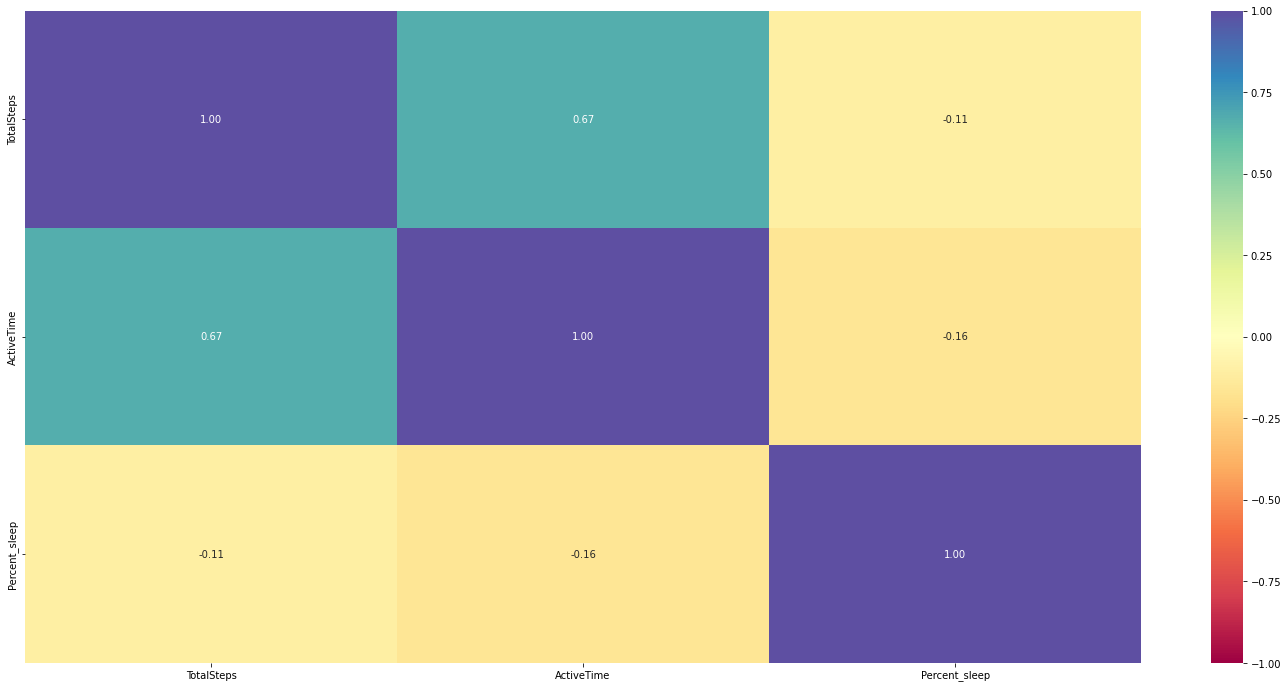

In [19]:
# Plot the heatmap 
col_list = ['TotalSteps', 'ActiveTime', 'Percent_sleep']
plt.figure(figsize=(25, 12))
sns.heatmap(ta[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Total steps and Active time seem to be the only numeric valuse that have a positive correlation. This makes sense since we expect you time active go up the farther or more steps you take. 

In [20]:
# Create a dataframes that will help compare beginning of the month and end of month to evaluate good habits. 

begin_month = d[d['Day']< '2016-05-01']
end_month = d[d['Day']>= '2016-05-01']


end_month.head()

,Id_str,Day,TotalSteps,D_total,ActiveTime,PercentActive
0,1503960366,2016-05-12,0,0.00,0,0.00
2,1503960366,2016-05-06,12159,8.03,30,2.08
4,1503960366,2016-05-08,10060,6.58,52,3.61
6,1503960366,2016-05-09,12022,7.72,57,3.96
13,1503960366,2016-05-02,14727,9.71,56,3.89


In [21]:
begin_month.head()

,Id_str,Day,TotalSteps,D_total,ActiveTime,PercentActive
1,1503960366,2016-04-24,10039,6.41,44,3.06
3,1503960366,2016-04-21,9819,6.34,27,1.88
5,1503960366,2016-04-16,12669,8.16,46,3.19
7,1503960366,2016-04-27,18134,12.21,89,6.18
8,1503960366,2016-04-14,10460,6.74,41,2.85


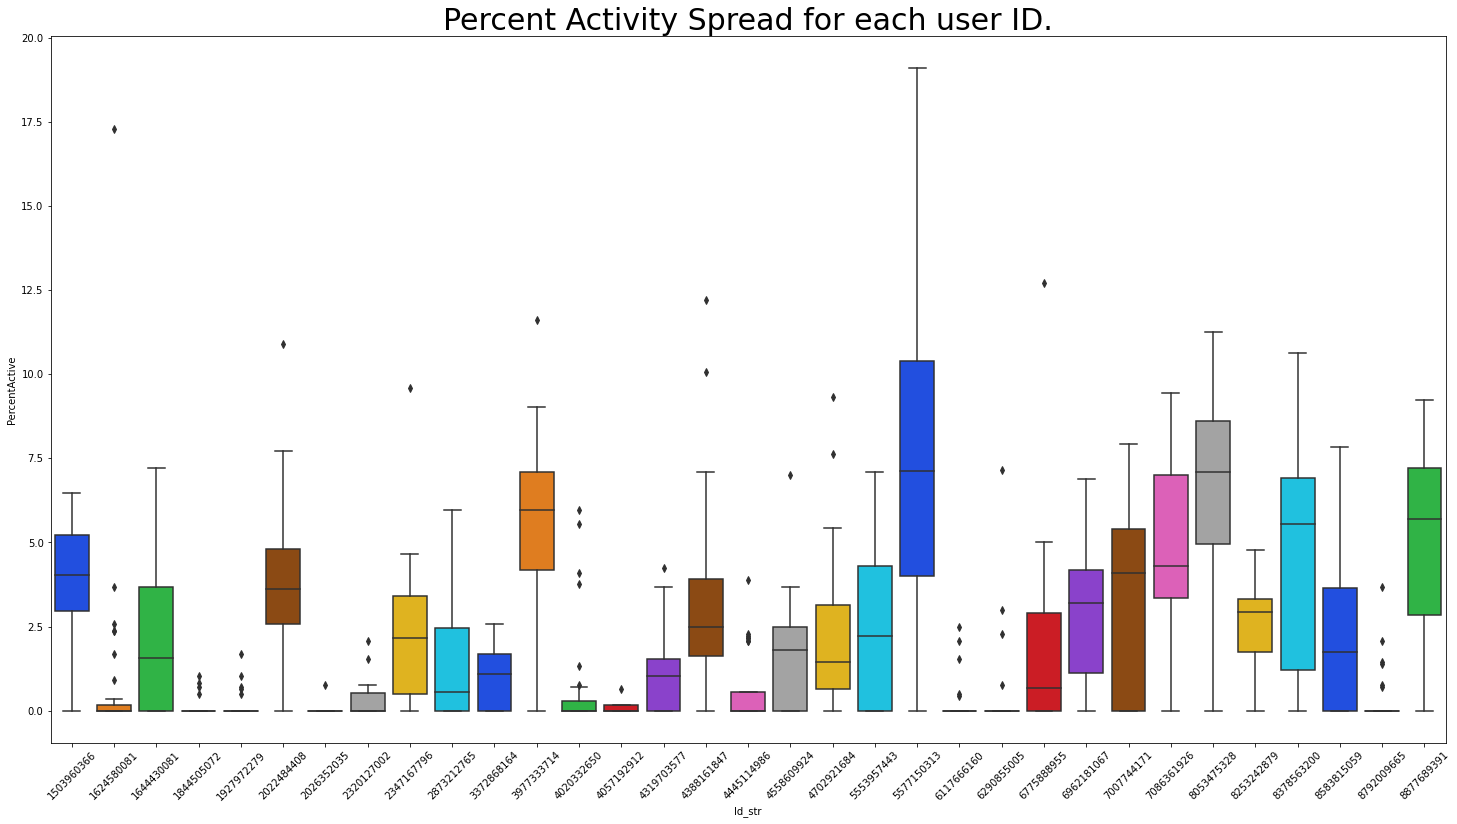

In [22]:
plt.figure(figsize=(25, 13))
a=sns.boxplot(x='Id_str', y = 'PercentActive', data=d, palette='bright')
plt.xticks(rotation = 45)
a.set_title("Percent Activity Spread for each user ID.", fontsize=30)
plt.show() ##plots the ID vs Percent Activity 

In [23]:
b_count = begin_month[begin_month['ActiveTime']>30]

b_count = b_count.groupby(['Id_str'], as_index = False)['ActiveTime'].count()

b_count.head()
# Creates a table with count of days with more than 30 min of activity for the beginning of the month

,Id_str,ActiveTime
0,1503960366,17
1,1624580081,4
2,1644430081,10
3,2022484408,17
4,2347167796,9


In [24]:
b_count.shape[0] #counts users with more than 30 min activity per day in the beginning of the month

28

In [25]:
e_count = end_month[end_month['ActiveTime']>30]

e_count = e_count.groupby(['Id_str'], as_index = False)['ActiveTime'].count()

e_count.head()
# Creates a table with count of days with more than 30 min of activity for the end of the month

,Id_str,ActiveTime
0,1503960366,10
1,1624580081,1
2,1644430081,4
3,2022484408,10
4,2873212765,3


In [26]:
e_count.shape[0]  #counts users with more than 30 min activity per day in the beginning of the month

23

We had less users get the minumum suggested amount of activity at the end of the month than at the beginning. This could be due to loss of motivation.¶

In [27]:
step_count = d.groupby('Id_str').agg('median').reset_index()
step_count

,Id_str,TotalSteps,D_total,ActiveTime,PercentActive
0,1503960366,12207.0,8.030,58.0,4.030
1,1624580081,4026.0,2.620,0.0,0.000
2,1644430081,6683.5,4.860,22.5,1.565
3,1844505072,2237.0,1.480,0.0,0.000
4,1927972279,152.0,0.110,0.0,0.000
5,2022484408,11548.0,8.290,52.0,3.610
6,2026352035,5528.0,3.450,0.0,0.000
7,2320127002,5057.0,3.410,0.0,0.000
8,2347167796,9781.0,6.540,31.0,2.155
9,2873212765,7762.0,5.240,8.0,0.560


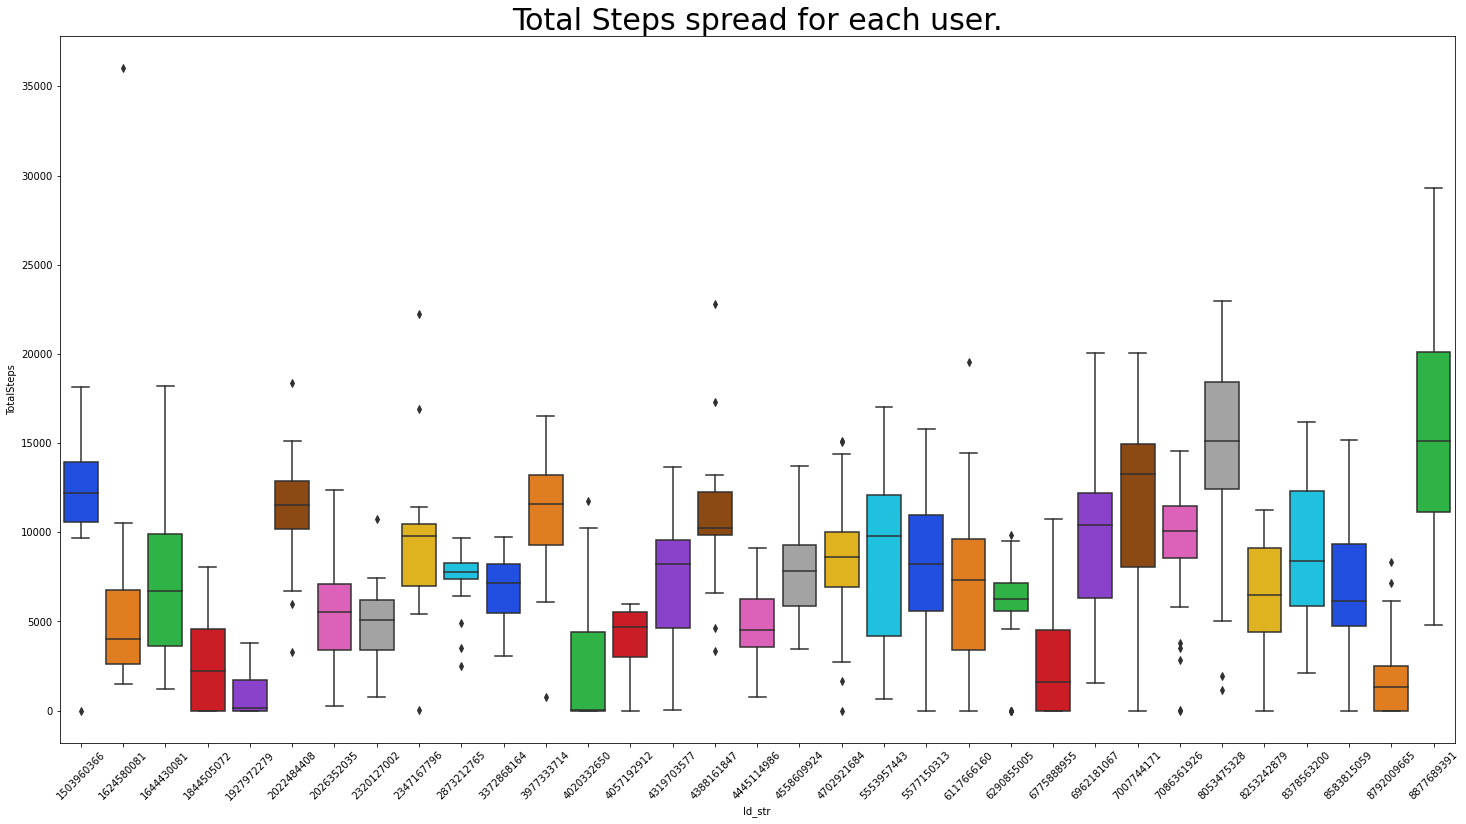

In [28]:
plt.figure(figsize=(25, 13))
d=sns.boxplot(x='Id_str', y = 'TotalSteps', data=d, palette='bright')
plt.xticks(rotation = 45)
d.set_title("Total Steps spread for each user.", fontsize=30)
plt.show()

In [29]:
all_count = b_count.merge(e_count, how = 'outer', on = 'Id_str', suffixes=('_b', '_e')).fillna(0)
all_count

,Id_str,ActiveTime_b,ActiveTime_e
0,1503960366,17,10.0
1,1624580081,4,1.0
2,1644430081,10,4.0
3,2022484408,17,10.0
4,2347167796,9,0.0
5,2873212765,7,3.0
6,3372868164,2,0.0
7,3977333714,15,10.0
8,4020332650,2,2.0
9,4319703577,2,3.0


In [30]:
ac=pd.melt(all_count, id_vars = 'Id_str', value_vars = ['ActiveTime_b', 'ActiveTime_e'])
ac.head()

,Id_str,variable,value
0,1503960366,ActiveTime_b,17.0
1,1624580081,ActiveTime_b,4.0
2,1644430081,ActiveTime_b,10.0
3,2022484408,ActiveTime_b,17.0
4,2347167796,ActiveTime_b,9.0


In [31]:
ac['Id_str'].nunique() 

28

<Figure size 720x720 with 0 Axes>

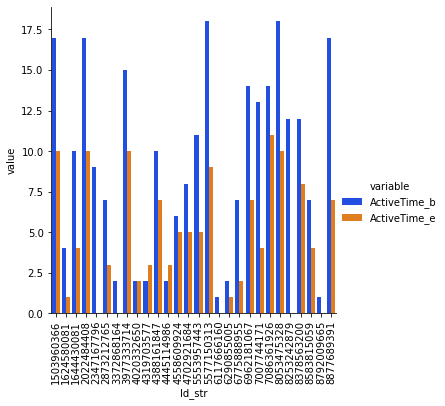

In [32]:

plt.gcf().set_size_inches(10,10)
b=sns.catplot(x='Id_str', y = 'value', data=ac, palette='bright', hue = 'variable', kind='bar')
plt.xticks(rotation = 90)
#b.set_title("Count of days that had more than 30 min of activty for each user.", fontsize=30)
plt.show(); ##plots the ID vs Percent Activity 

#### The number of active days for users that were consistent went down as the month progressed. We can assume this is due to lack of motivation, or injury, or the novelty effect, or perhaps some other reason. Sending out surveys for users around the 20-30 mark would yield more information as to why we see a reduction in use.


In [33]:
no_act_b = begin_month[begin_month['TotalSteps']==0]
no_act_b.head() # creates table that counts inactive days for each user in the beginning of the month. 

,Id_str,Day,TotalSteps,D_total,ActiveTime,PercentActive
97,1844505072,2016-04-25,0,0.0,0,0.0
116,1844505072,2016-04-24,0,0.0,0,0.0
117,1844505072,2016-04-26,0,0.0,0,0.0
125,1927972279,2016-04-19,0,0.0,0,0.0
126,1927972279,2016-04-27,0,0.0,0,0.0


In [34]:
no_act_b = no_act_b.groupby(['Id_str'], as_index = True)['TotalSteps'].size()
no_act_b

Id_str
1844505072     3
1927972279     8
4020332650    13
4057192912     1
6117666160     4
6290855005     4
6775888955     6
7086361926     1
8253242879     1
8792009665     4
Name: TotalSteps, dtype: int64

In [35]:
no_act_e = end_month[end_month['TotalSteps']==0]
no_act_e.head() # creates table that counts inactive days for each user in the end of the month. 

,Id_str,Day,TotalSteps,D_total,ActiveTime,PercentActive
0,1503960366,2016-05-12,0,0.0,0,0.0
93,1844505072,2016-05-02,0,0.0,0,0.0
96,1844505072,2016-05-12,0,0.0,0,0.0
104,1844505072,2016-05-11,0,0.0,0,0.0
107,1844505072,2016-05-07,0,0.0,0,0.0


In [36]:
no_act_e = no_act_e.groupby(['Id_str'], as_index = True)['TotalSteps'].size()
no_act_e

Id_str
1503960366    1
1844505072    7
1927972279    6
4020332650    1
4702921684    1
5577150313    2
6117666160    1
6290855005    1
6775888955    3
7007744171    2
8583815059    1
8792009665    6
Name: TotalSteps, dtype: int64

In [37]:
no_act_b.shape[0] #counts the number of users who had at least one day with no activity at the beginning of the month

10

In [38]:
no_act_e.shape[0] # counts the number of users who had at least one day with no activity at the end of the month. 

12

In [39]:
no_act_s =ta[ta['TotalSteps']==0]
no_act_s
#creates a table with users who tracked sleep info and finds how many days they had with no activity. 

,Id_str,Day,TotalSteps,D_total,ActiveTime,PercentActive,Percent_sleep


#### Tables above show that users who tracked weight information had no days with zero activity. Users who logged weight information also used their unit for other activities.

<function matplotlib.pyplot.show(close=None, block=None)>

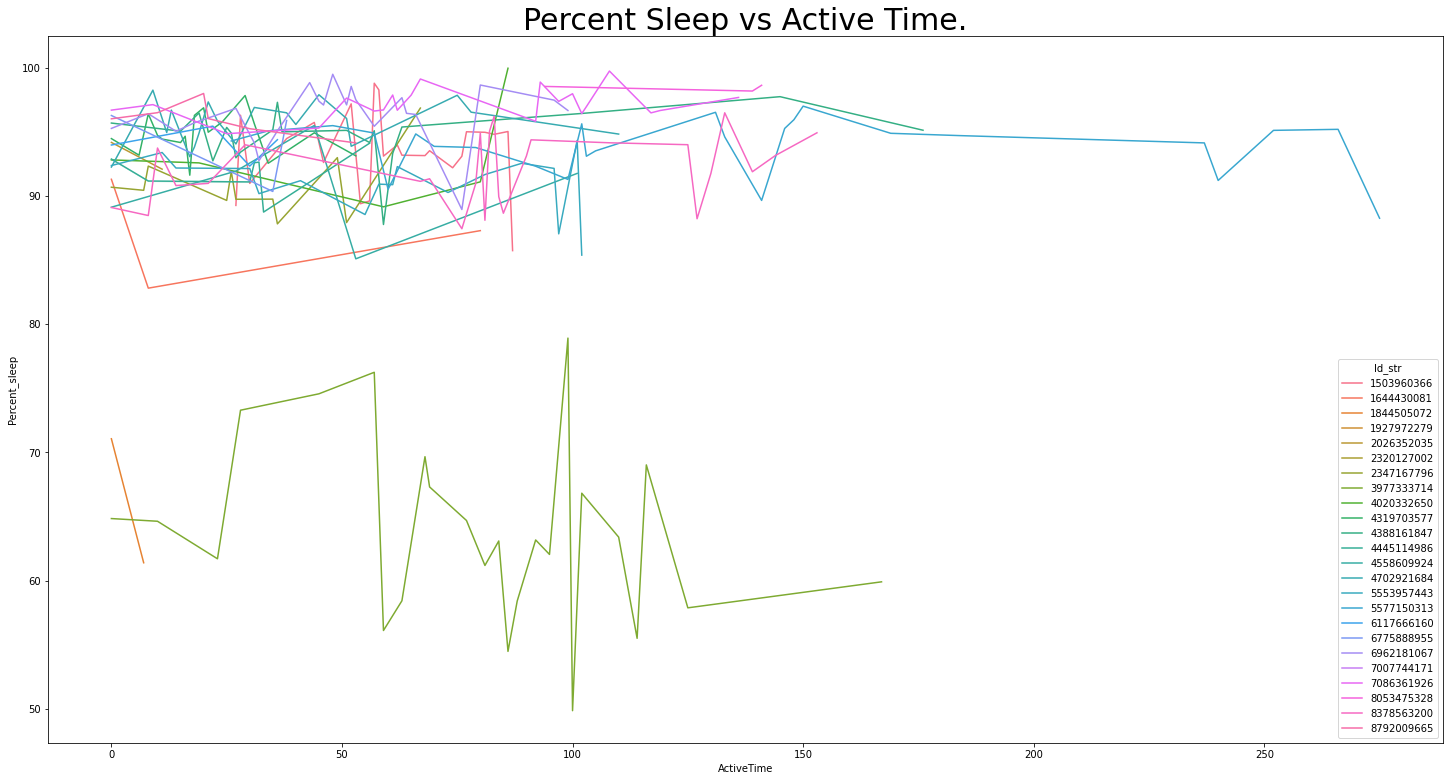

In [40]:
plt.figure(figsize = (25, 13))
c= sns.lineplot(data=ta, x = 'ActiveTime' , y = 'Percent_sleep', ci = False ,hue='Id_str')
c.set_title("Percent Sleep vs Active Time.", fontsize=30);
plt.show

#### Percent sleep is meant to be an indicator of quality of sleep. We see no correlation or trends from the graph between active time and how much sleep users got at the end of the day. 

##### Observations on use
* Almost half the users missed at least one day of activity tracking.
* There were more inactve days later in the month for the entire group.
* Users who track more activities i.e. sleep and weight are more likely to use their device every day.
* 4 users had 10 or more missed days of activity tracking. 
* 5 users had no days where they got at least 30 min of recommended daily activity. 

## Act

This analysis and the recommendations from the data are limited. We had a small sample set and a small window, so we are only able to do a descriptive analysis rather than trying to create a model for prediction. 
1. What are some trends in smart device usage?
 * We can see that not all users are dedicated users. Further analysis using the hourly data can help us categorize users and create notifications to target users when they are most active with the device. 
 * The fact that utilizing the weight and sleep function made for a more dedicated user leads us to think that ensuring users are aware and encouraged to use more of the features will create a more loyal user. 
 * We can see that users used the device as positive feedback and that those that used the device more often had higher activitiy time, calories burned, and more steps.
2. How could these trends apply to Bellabeat customers?
 * Time is a device similar to a fitbit so we can predict that users will wear the device almost daily and use it to track activity. Tailoring Time to Bellabeat customers using this information would be ideal. From the data we see that the more features the cutomers engage with on the product the more consistently they use the product. 
3. How could these trends help influence Bellabeat marketing strategy?
 * Creating targeted notifications to encourage keeping up with good habits as well as notifying of trends in activity will help create more loyal users. 
 * Creating a survey for customers when we expect the novelty of the wear off can help us tailor the experience for the users and encourage them to continue engagement with their product or upsell them to a subscription to add on more features. 